In [77]:
import pickle
import numpy as np
import pandas as pd

In [78]:
with open('cross_validation/train.pl', 'rb') as f:
    results = pickle.load(f)

In [79]:
score_keys = np.array(results['score_keys'])

In [80]:
list(zip(results['metric_keys'], np.array(results['metrics']).shape))

[('iteration', 2),
 ('outer', 1),
 ('inner', 5),
 ('param', 4),
 ('score', 12),
 ('epoch', 4000)]

In [81]:
np.array(results['metrics']).shape

(2, 1, 5, 4, 12, 4000)

In [82]:
metrics = np.array(results['metrics'])
metrics.shape

(2, 1, 5, 4, 12, 4000)

In [83]:
len(score_keys)

12

In [89]:
[{k: v for k, v in d.items() if k != 'tboard'} for d in results['params']][:4]

[{'batch_size': 10,
  'c_weights': True,
  'cv_iter': 0,
  'dropout': 0.9,
  'hidden_size': 512,
  'joint': True,
  'recurrent_dropout': 0,
  'regularizer': None,
  'seq_len': 6},
 {'batch_size': 10,
  'c_weights': False,
  'cv_iter': 0,
  'dropout': 0.9,
  'hidden_size': 512,
  'joint': True,
  'recurrent_dropout': 0,
  'regularizer': None,
  'seq_len': 6},
 {'batch_size': 10,
  'c_weights': True,
  'cv_iter': 0,
  'dropout': 0.9,
  'hidden_size': 512,
  'joint': True,
  'recurrent_dropout': 0,
  'regularizer': 'l2',
  'seq_len': 6},
 {'batch_size': 10,
  'c_weights': True,
  'cv_iter': 0,
  'dropout': 0.9,
  'hidden_size': 512,
  'joint': True,
  'recurrent_dropout': 0.9,
  'regularizer': None,
  'seq_len': 6}]

#### Metrics

In [87]:
pd.DataFrame(metrics[:,:,:,:,-1].mean(0).mean(1).squeeze(),columns=score_keys)

,link_categorical_accuracy,link_loss,link_macro_f1,loss,type_categorical_accuracy,type_loss,type_macro_f1,val_link_categorical_accuracy,val_link_loss,val_loss,val_type_categorical_accuracy,val_type_loss
0,0.795000,0.243016,0.325993,0.174082,0.968610,0.105148,0.068921,0.347500,2.357739,1.575272,0.767541,0.792805
1,0.856875,0.181317,0.325827,0.114871,0.980993,0.048424,0.099622,0.434167,1.956918,1.244630,0.841742,0.532341
2,0.368542,1.311812,0.284513,1.679195,0.769717,0.530423,0.038769,0.285000,1.446652,1.749869,0.721547,0.537139
3,0.595833,0.777689,0.455726,0.533692,0.899475,0.289694,0.085907,0.477500,1.145493,0.814281,0.842066,0.483069


### Plots

In [90]:
results['score_keys']

['link_categorical_accuracy',
 'link_loss',
 'link_macro_f1',
 'loss',
 'type_categorical_accuracy',
 'type_loss',
 'type_macro_f1',
 'val_link_categorical_accuracy',
 'val_link_loss',
 'val_loss',
 'val_type_categorical_accuracy',
 'val_type_loss']

In [91]:
np.array(results['metrics']).shape

(2, 1, 5, 4, 12, 4000)

In [92]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

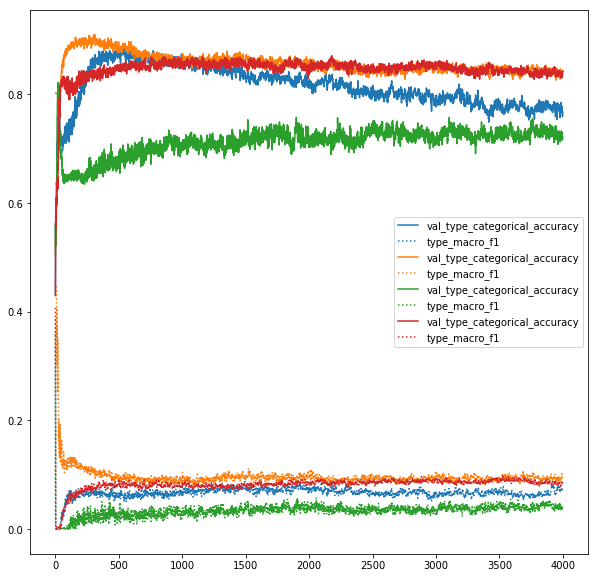

In [96]:
plt.figure(figsize=(10, 10))

colors = ['r','b','g','']
for i in range(metrics.shape[3]):
    for score, line in zip(['val_type_categorical_accuracy', 'type_macro_f1'],
                 ['-', ':']):
        ind = list(score_keys).index(score)
        pl, = plt.plot(metrics.mean(0).mean(1).squeeze()[i, ind].T, 
                       label=score, 
                       ls=line, 
                       c=pl.get_color() if line == ':' else None)
        
plt.legend()

In [51]:
metrics[:,:,:,:,:,-1].mean(0).mean(1).squeeze().shape

(4, 12)